<a href="https://colab.research.google.com/github/makhai88/renting_data/blob/main/grover_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA UNDERSTANDING

- Added all 4 tables to pgAdmin(postgreSQL)

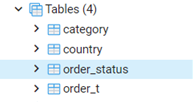

- Created the Entitty Relationship diagram to understand how to coonect and get a feeling about data set

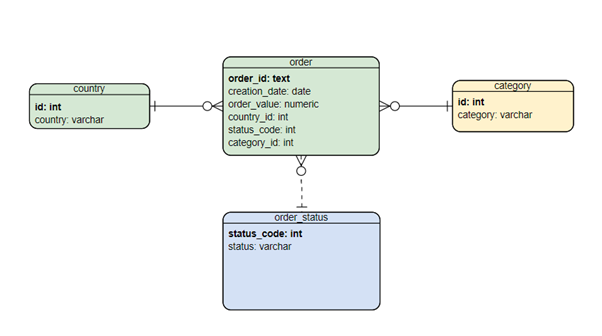

- Count the number of records - orders data set have 38541 records
- Change the data type of `creation_date` column


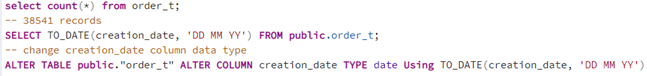

- `order_id` is unique

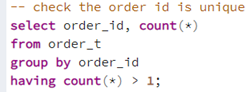

- Joined the tables using respective keys

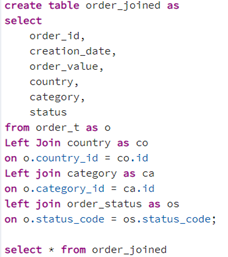

- Imported the joined data set in to Google Colab for further investigation

# Packages

In [127]:
import pandas as pd
import numpy as np
from sklearn import datasets
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy import stats
##
import random
from pathlib import Path
import collections
import pylab
##
import seaborn as sns
import matplotlib.pyplot as plt
##
import warnings
warnings.filterwarnings("ignore")
##
%matplotlib inline

# Import the Dataset

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
path = "/content/drive/My Drive/grover/order_joined.csv"
df = pd.read_csv(path, sep=",")


# EDA

In [130]:
df.head()

,order_id,creation_date,order_value,country,category,status
0,GHYt0/UnRN+7MrEE2OyZ+fXmURbaUBcDLVfTCHAS0Dc=,2020-03-25,54.309623,Country 1,Appliances,DECLINED
1,RG+ZjxjZ6a+RRsylicXP0mgaJ6ygEUnIyZINzepbGcY=,2020-05-20,25.020920,Country 1,Appliances,DECLINED
2,nAx18p6d7syuT4X9UaqNlndc2We44YtxaAbiKsJlkRs=,2020-04-30,23.347280,Country 1,Gaming,CANCELLED
3,3FkEK2/TO+Li0pE6k9x41tjULCoZZPloZ4L6hhxhFis=,2020-05-04,58.493724,Country 1,Furniture,DECLINED
4,yzmBgdSf6W0vG2u+vhjj2Q/2Byccd66DRCatbmnpm6E=,2020-04-15,58.493724,Country 1,Appliances,DECLINED


In [131]:
# data set have 38541 records over 6 columns
df.shape

(38541, 6)

In [132]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38541 entries, 0 to 38540
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       38541 non-null  object 
 1   creation_date  38541 non-null  object 
 2   order_value    38541 non-null  float64
 3   country        38541 non-null  object 
 4   category       38541 non-null  object 
 5   status         38541 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.8+ MB


- data types of `creation_date`, `country`, `category` and `status` columns needs to change

In [133]:
# Look for null values
df.isnull().sum()

order_id         0
creation_date    0
order_value      0
country          0
category         0
status           0
dtype: int64

- No null values found in any column

In [134]:
# change data types
df['creation_date']  = pd.to_datetime(df['creation_date'], format='%Y-%m-%d')
df[['category','status','country']] = df[['category','status','country']].astype('category')

In [135]:
df.dtypes

order_id                 object
creation_date    datetime64[ns]
order_value             float64
country                category
category               category
status                 category
dtype: object

In [136]:
# check the min max values of order value
df["order_value"].agg(["max","min"])

max    3152.719665
min       2.426778
Name: order_value, dtype: float64

In [137]:
# Perform Shapiro-Wilk Test for normality
# normality test
stat, p = shapiro(df['order_value'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
# Assume order_value is normally distributed  
# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.

Statistics=0.568, p=0.000
Sample does not look Gaussian (reject H0)


- based on Shapiro test and qq plot,  `order_value` do not follow a normal distribution

Text(0.5, 1.0, 'BOX PLOT - order value')

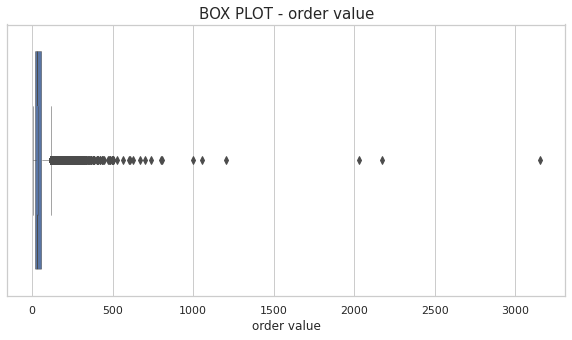

In [138]:
# box bot of order value
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(data = df ,x = 'order_value',showfliers=True,notch= True,width= 0.8,linewidth=0.5,orient='h')
plt.xlabel("order value", fontsize= 12)
#plt.ylabel("Passenger Age", fontsize= 12)
plt.title("BOX PLOT - order value", fontsize= 15)

- There extreme values in the value in `order_value`
- SInce it possible for customers to add any number of products, these extreme values can not be removed
- They also hold valuble information

In [139]:
# descriptives
dataset = df['order_value']
    
mean = np.round(np.mean(dataset), 2)
median = np.round(np.median(dataset), 2)
min_value = np.round(dataset.min(), 2)
max_value = np.round(dataset.max(), 2)
quartile_1 = np.round(dataset.quantile(0.25), 2)
quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
iqr = np.round(quartile_3 - quartile_1, 2)
upper_value = quartile_3 + 1.5 * iqr
lower_value = quartile_1 - 1.5 * iqr

print('Min: %s' % min_value)
print('Mean: %s' % mean)
print('Max: %s' % max_value)
print('25th percentile: %s' % quartile_1)
print('Median: %s' % median)
print('75th percentile: %s' % quartile_3)
# to identify bounderis according to IQR outlier identification method
print('Interquartile range (IQR): %s' % iqr)
print('Max boundry: %s' % upper_value)
print('Min boundry: %s' % lower_value)

Min: 2.43
Mean: 46.59
Max: 3152.72
25th percentile: 20.84
Median: 33.39
75th percentile: 58.49
Interquartile range (IQR): 37.65
Max boundry: 114.965
Min boundry: -35.63499999999999


- Is it possible to have order value as 2.43 euros?
- 25% of orders are below 20.84
- 75% of the orders are below 58.49 euros
- By assuming all these values are monthly subscriptions
- Is it possible to have order value of 3152 for a month? 
 - Could be combinations of items in a single order
- Mean order value is 46.59, but it could be influenced by these extreme values
- Median is 33.39, which is the middle value


In [140]:
print('Standard Deviation: %s' % df.order_value.std())
print('Skewness: %s' % df.order_value.skew())

Standard Deviation: 45.28893563048672
Skewness: 16.561210504607544


In [141]:
df['category'].value_counts()

Appliances    24458
Gaming        11504
Furniture      1159
Books           920
Clothing        500
Name: category, dtype: int64

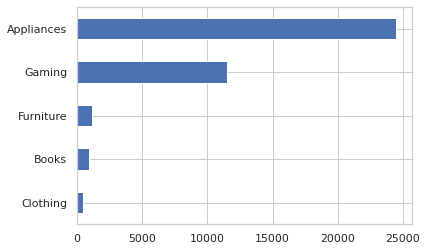

In [142]:
df['category'].value_counts().sort_values().plot(kind = 'barh')

In [143]:
df['country'].value_counts()

Country 1    35499
Country 2     2947
Country 3       95
Name: country, dtype: int64

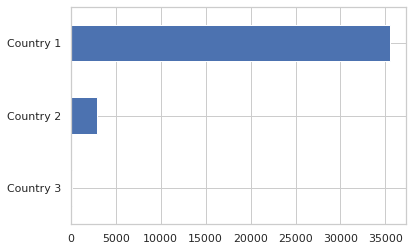

In [144]:
df['country'].value_counts().sort_values().plot(kind = 'barh')

In [145]:
df['status'].value_counts()

DECLINED     32464
CANCELLED     5972
APPROVED       105
Name: status, dtype: int64

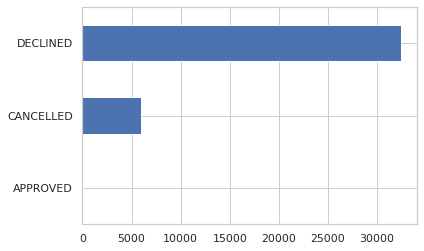

In [146]:
df['status'].value_counts().sort_values().plot(kind = 'barh')

In [147]:
df["creation_date"].agg(["max","min"])

max   2020-05-30
min   2020-03-01
Name: creation_date, dtype: datetime64[ns]

records are for 3 months

# Statistical anlysis on order_value and order_status

- order value is not normally distributed
- order status have 3 levels
- Hence, Kruskal-Wallis Test
- Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups
- Non-Parametric Test:  It is a test which does not follow normal distribution  

In [148]:
group_a = df.loc[df['status'] == 'APPROVED', ['order_value']]
group_c = df.loc[df['status'] == 'CANCELLED', ['order_value']]
group_d = df.loc[df['status'] == 'DECLINED', ['order_value']]

In [149]:
print(group_a.shape)
print(group_c.shape)
print(group_d.shape)

(105, 1)
(5972, 1)
(32464, 1)


In [150]:
df.status.value_counts()

DECLINED     32464
CANCELLED     5972
APPROVED       105
Name: status, dtype: int64

- The null hypothesis (H0): The median is equal across all status groups.

- The alternative hypothesis: (Ha): The median is not equal across all status groups

In [151]:
# Kruskal wallis test
stats.kruskal(group_a, group_c, group_d)

KruskalResult(statistic=108.62009627217232, pvalue=2.5908709563623693e-24)

- p-value is less than 0.05, we can reject the null hypothesis 
- Reject the null hypothesis and conclude that not all the status level medians are equal
- which means, differences between medians of status levels are statistacally significant  
- We have sufficient evidence to conclude that the status leads to statistically significant differences in order value
- Statistical significance itself doesn't imply that your results have practical consequence
- Need to apply specialized knowledge to determine whether the difference is practically significant

In [152]:
 pip install scikit-posthocs

In [153]:
#perform Dunn's test using a Bonferonni correction for the p-values
# https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn/
import scikit_posthocs as sp
sp.posthoc_dunn(df,'order_value','status', p_adjust = 'bonferroni')

,APPROVED,CANCELLED,DECLINED
APPROVED,1.000000,1.000000e+00,8.939744e-01
CANCELLED,1.000000,1.000000e+00,8.200415e-25
DECLINED,0.893974,8.200415e-25,1.000000e+00


- The adjusted p-value for the difference between DECLINED and CANCELLED is 8.200415e-25
- the only two groups that are statistically significantly different at α = .05 are DECLINED & CANCELLED
- Which means the DECLINED and CANCELLED status leads a statistaclly significant differences in order value 

In [154]:
print('Approved : %s' % group_a.median())
print('Cancelled: %s' % group_c.median())
print('Declined: %s' % group_d.median())

Approved : order_value    33.389121
dtype: float64
Cancelled: order_value    33.389121
dtype: float64
Declined: order_value    37.573222
dtype: float64


# Conclusion
- Decline is company decision, Which grover has control, but cancelling orders based on user behaviour
- This results confirm that approvals have no relationship with order value
- Hence, need further anlysis to find if there is a relation with decline and cancelled orders with order_value
- Decline and cancelled orders could have a relation to order value, Higher value orders have more chances of cancelling
- But that do not explain why lower value orders have more cancellations


# Further Anlysis on Order Value

In [155]:
# check the order values less than 10 euros
df_10 = df[df.order_value < 10]
df_10.shape

(1454, 6)

In [156]:
df_10.status.value_counts()

DECLINED     1200
CANCELLED     251
APPROVED        3
Name: status, dtype: int64

There are 1454 order below 10 euros
- Out of all 3 are approved, why?
- It makes sense to reject orders with high order value, what could be the reason decline those small orders

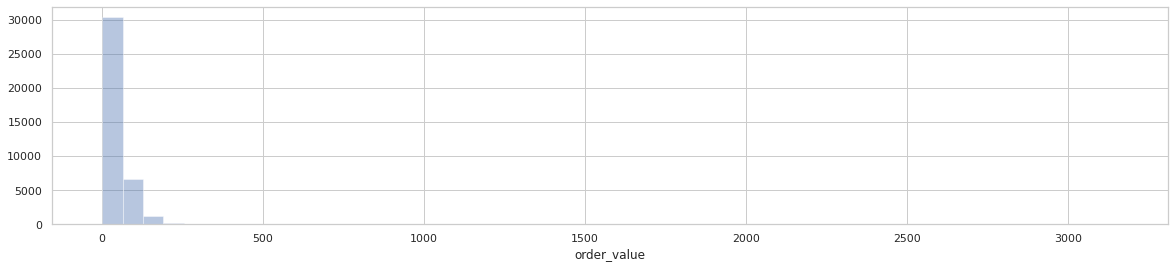

In [157]:
#histogram for order value
fig = plt.figure(figsize=(20,4))
sns.distplot(df['order_value'], kde=False, hist=True)

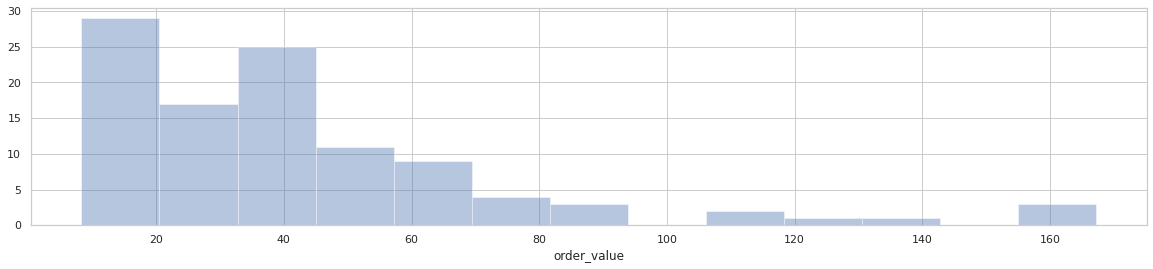

In [158]:
#histogram for approved orders
df_approved = df[df.status == 'APPROVED']
fig = plt.figure(figsize=(20,4))
sns.distplot(df_approved['order_value'], kde=False, hist=True)

In [159]:
df_approved.describe()

,order_value
count,105.000000
mean,43.040446
std,32.341149
min,8.284519
25%,19.163180
50%,33.389121
75%,50.125523
max,167.196653


- product value is very high or very low orders are not approved
- order value between 8.28 and 167.19 have approved
- only 105 cases were approved out of 38541 orders

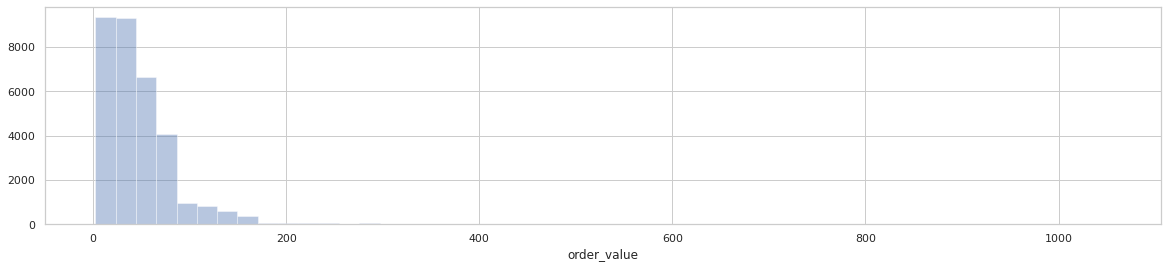

In [160]:
#histogram for approved orders
df_declined = df[df.status == 'DECLINED']
fig = plt.figure(figsize=(20,4))
sns.distplot(df_declined['order_value'], kde=False, hist=True)

In [161]:
# decriptives of declined orders
df_declined.describe()

,order_value
count,32464.000000
mean,47.130571
std,39.585801
min,2.426778
25%,20.836820
50%,37.573222
75%,58.493724
max,1053.221757


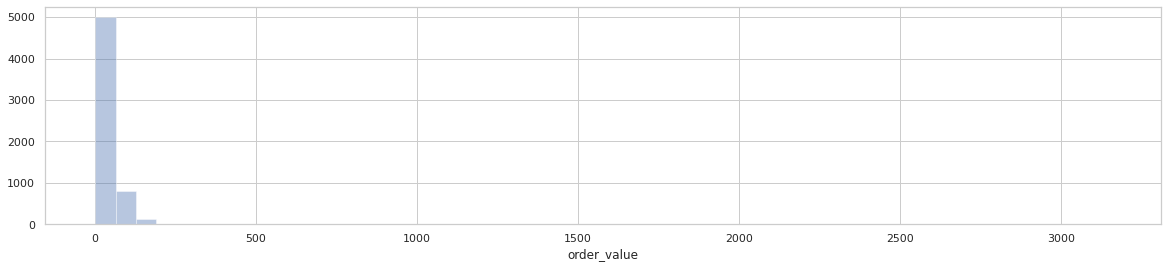

In [162]:
#histogram for approved orders
df_cancelled = df[df.status == 'CANCELLED']
fig = plt.figure(figsize=(20,4))
sns.distplot(df_cancelled['order_value'], kde=False, hist=True)

In [163]:
df.groupby('category')['status'].value_counts()


category    status   
Appliances  DECLINED     21046
            CANCELLED     3343
            APPROVED        69
Books       DECLINED       772
            CANCELLED      144
            APPROVED         4
Clothing    DECLINED       425
            CANCELLED       75
Furniture   DECLINED       900
            CANCELLED      248
            APPROVED        11
Gaming      DECLINED      9321
            CANCELLED     2162
            APPROVED        21
Name: status, dtype: int64

In [164]:
df_ratio = (df.groupby('category').status.value_counts(normalize=True).rename('ratio').reset_index())

In [165]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120,130,140,150,160,3152.72]
binning = pd.cut(df.order_value,bins)
#df.groupby(binning)['status'].agg(['count'])
df_binned_count = (df.groupby(binning)['status'].value_counts(normalize=True).rename('ratio').reset_index())
df_binned_count

,order_value,status,ratio
0,"(0.0, 10.0]",DECLINED,0.825309
1,"(0.0, 10.0]",CANCELLED,0.172627
2,"(0.0, 10.0]",APPROVED,0.002063
3,"(10.0, 20.0]",DECLINED,0.815631
4,"(10.0, 20.0]",CANCELLED,0.180647
5,"(10.0, 20.0]",APPROVED,0.003722
6,"(20.0, 30.0]",DECLINED,0.832270
7,"(20.0, 30.0]",CANCELLED,0.165647
8,"(20.0, 30.0]",APPROVED,0.002084
9,"(30.0, 40.0]",DECLINED,0.834810


In [166]:
df_binned_count[df_binned_count.status == 'DECLINED']

,order_value,status,ratio
0,"(0.0, 10.0]",DECLINED,0.825309
3,"(10.0, 20.0]",DECLINED,0.815631
6,"(20.0, 30.0]",DECLINED,0.832270
9,"(30.0, 40.0]",DECLINED,0.834810
12,"(40.0, 50.0]",DECLINED,0.839913
15,"(50.0, 60.0]",DECLINED,0.845075
18,"(60.0, 70.0]",DECLINED,0.897717
21,"(70.0, 80.0]",DECLINED,0.878986
24,"(80.0, 90.0]",DECLINED,0.868354
27,"(90.0, 100.0]",DECLINED,0.855263


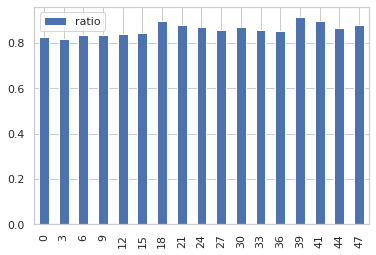

In [167]:
df_binned_count[df_binned_count.status == 'DECLINED'].plot(kind='bar')

- DECLINED ratio is lower for small values, but higher for large values

In [168]:
df_binned_count[df_binned_count.status == 'CANCELLED']

,order_value,status,ratio
1,"(0.0, 10.0]",CANCELLED,0.172627
4,"(10.0, 20.0]",CANCELLED,0.180647
7,"(20.0, 30.0]",CANCELLED,0.165647
10,"(30.0, 40.0]",CANCELLED,0.162025
13,"(40.0, 50.0]",CANCELLED,0.155378
16,"(50.0, 60.0]",CANCELLED,0.152790
19,"(60.0, 70.0]",CANCELLED,0.100527
22,"(70.0, 80.0]",CANCELLED,0.118116
25,"(80.0, 90.0]",CANCELLED,0.129958
28,"(90.0, 100.0]",CANCELLED,0.142857


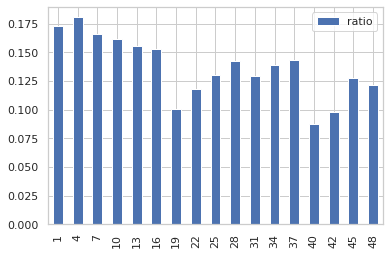

In [169]:
df_binned_count[df_binned_count.status == 'CANCELLED'].plot(kind='bar')

- cancelled order ration decreased with order value, users tend to apply for high value items, but they are getting cancelled

In [170]:
df_binned_count[df_binned_count.status == 'APPROVED']

,order_value,status,ratio
2,"(0.0, 10.0]",APPROVED,0.002063
5,"(10.0, 20.0]",APPROVED,0.003722
8,"(20.0, 30.0]",APPROVED,0.002084
11,"(30.0, 40.0]",APPROVED,0.003165
14,"(40.0, 50.0]",APPROVED,0.004708
17,"(50.0, 60.0]",APPROVED,0.002135
20,"(60.0, 70.0]",APPROVED,0.001756
23,"(70.0, 80.0]",APPROVED,0.002899
26,"(80.0, 90.0]",APPROVED,0.001688
29,"(90.0, 100.0]",APPROVED,0.001880


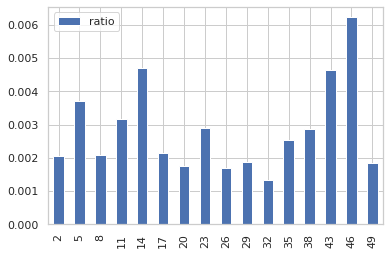

In [171]:
df_binned_count[df_binned_count.status == 'APPROVED'].plot(kind='bar')

- Approval ration is very low for orders below 10 euros, need to find why
- It do not follow a linear pattern
- But orders between 140 - 160 euros have higher approvals

# Status anlysis of categories

In [172]:
# approval ration by category
df_ratio[df_ratio.status == 'APPROVED'].sort_values('ratio', ascending = False )

,category,status,ratio
10,Furniture,APPROVED,0.009491
5,Books,APPROVED,0.004348
2,Appliances,APPROVED,0.002821
13,Gaming,APPROVED,0.001825


- Eventhough people interested more in appliances, furnitures and books have more approvals

In [173]:
# decline ratio by category
df_ratio[df_ratio.status == 'DECLINED'].sort_values('ratio', ascending = False )

,category,status,ratio
0,Appliances,DECLINED,0.860496
6,Clothing,DECLINED,0.850000
3,Books,DECLINED,0.839130
11,Gaming,DECLINED,0.810240
8,Furniture,DECLINED,0.776531


In [174]:
# cancelled ratio by category
df_ratio[df_ratio.status == 'CANCELLED'].sort_values('ratio', ascending = False )

,category,status,ratio
9,Furniture,CANCELLED,0.213978
12,Gaming,CANCELLED,0.187935
4,Books,CANCELLED,0.156522
7,Clothing,CANCELLED,0.150000
1,Appliances,CANCELLED,0.136683


- Users tend to apply for more appliances
- Users hesitant to apply for furnitures, Even though they have higher appravals, better to undrstand why